In [117]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [118]:
df = pd.read_csv(r"C:\Users\Shivaji\Downloads\Wholesale customers data.csv")

In [119]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [120]:
df.shape

(440, 8)

In [121]:
df.duplicated().sum()

0

In [122]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [123]:
df = df.drop('Channel', axis=1)  # Drop column 'Channel'


In [124]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [125]:
df = df.drop(['Region','Fresh'],axis=1,errors='ignore')  # Drop column 'Channel'
df

,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9656,7561,214,2674,1338
1,9810,9568,1762,3293,1776
2,8808,7684,2405,3516,7844
3,1196,4221,6404,507,1788
4,5410,7198,3915,1777,5185
...,...,...,...,...,...
435,12051,16027,13135,182,2204
436,1431,764,4510,93,2346
437,15488,30243,437,14841,1867
438,1981,2232,1038,168,2125


In [126]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
x=stscaler.fit_transform(df)

In [127]:
x

array([[ 0.52356777, -0.04111489, -0.58936716, -0.04356873, -0.06633906],
       [ 0.54445767,  0.17031835, -0.27013618,  0.08640684,  0.08915105],
       [ 0.40853771, -0.0281571 , -0.13753572,  0.13323164,  2.24329255],
       ...,
       [ 1.31467078,  2.34838631, -0.54337975,  2.51121768,  0.12145607],
       [-0.51753572, -0.60251388, -0.41944059, -0.56977032,  0.21304614],
       [-0.5559243 , -0.57322717, -0.62009417, -0.50488752, -0.52286938]])

In [128]:
import scipy.cluster.hierarchy as sch

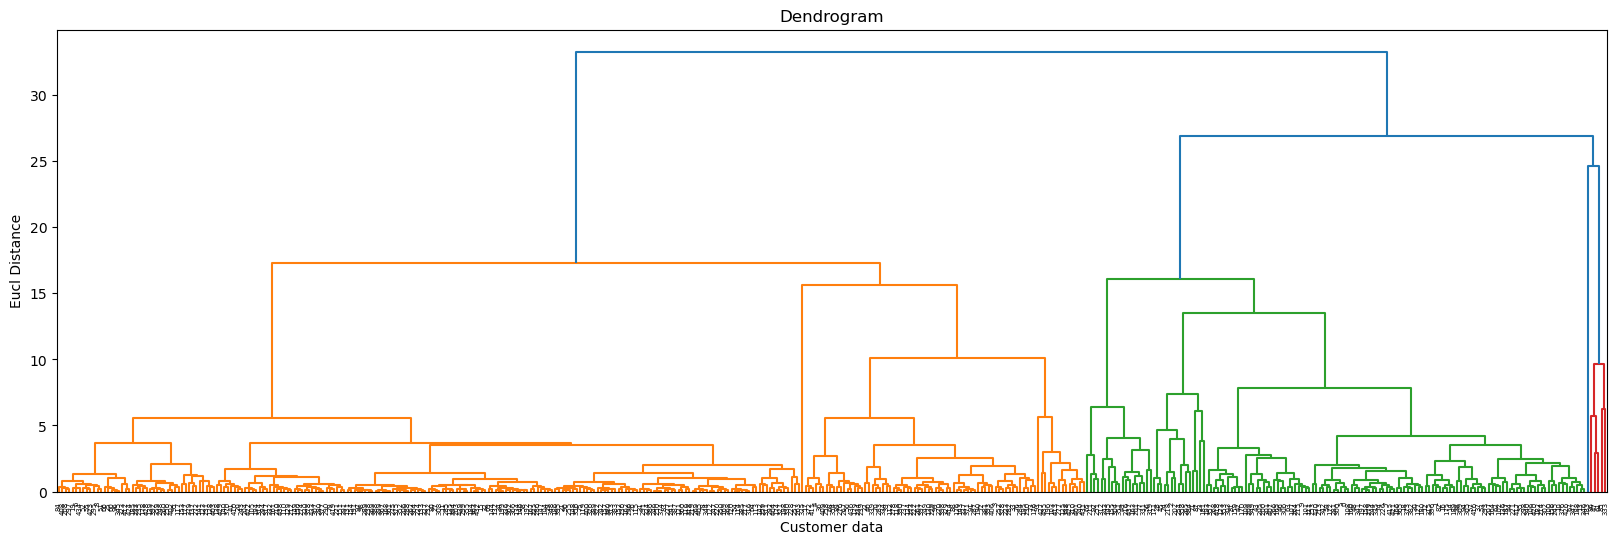

In [129]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [130]:
len(set(dendo['color_list']))-1

3

In [131]:
from sklearn.cluster import AgglomerativeClustering
group=AgglomerativeClustering(n_clusters=3)
group.fit_predict(x)

array([2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,

In [132]:
cluster=group.fit_predict(x)

In [133]:
cluster

array([2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,

In [134]:
cluster.shape

(440,)

In [135]:
group_num=pd.DataFrame(cluster)

In [136]:
group_num

,0
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [137]:
pd.concat([df,group_num],axis=1)

,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,0
0,9656,7561,214,2674,1338,2
1,9810,9568,1762,3293,1776,2
2,8808,7684,2405,3516,7844,2
3,1196,4221,6404,507,1788,1
4,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...
435,12051,16027,13135,182,2204,1
436,1431,764,4510,93,2346,1
437,15488,30243,437,14841,1867,2
438,1981,2232,1038,168,2125,1


In [139]:
from sklearn.metrics import silhouette_score
silhouette_score(x,cluster)

0.40094946491576194

In [140]:
x

array([[ 0.52356777, -0.04111489, -0.58936716, -0.04356873, -0.06633906],
       [ 0.54445767,  0.17031835, -0.27013618,  0.08640684,  0.08915105],
       [ 0.40853771, -0.0281571 , -0.13753572,  0.13323164,  2.24329255],
       ...,
       [ 1.31467078,  2.34838631, -0.54337975,  2.51121768,  0.12145607],
       [-0.51753572, -0.60251388, -0.41944059, -0.56977032,  0.21304614],
       [-0.5559243 , -0.57322717, -0.62009417, -0.50488752, -0.52286938]])

In [141]:
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
wcss=[]
for i  in range (2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [142]:
wcss

[1514.0692089416589,
 1193.934355036741,
 922.3815712883579,
 737.5009665472761,
 661.1474029406052,
 574.5259934423586,
 489.3991095642038,
 424.65456805375726,
 385.88090184065794]

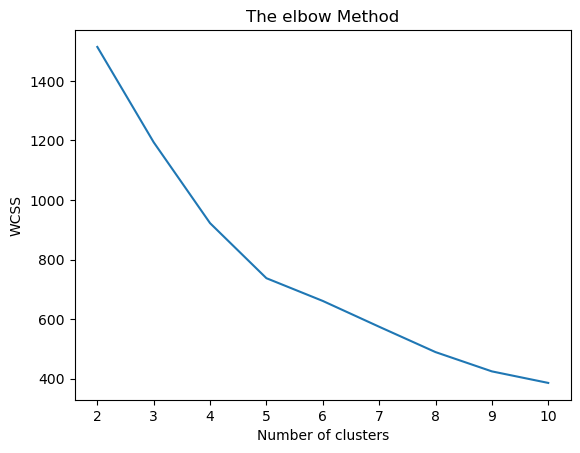

In [143]:
plt.plot(range(2,11),wcss)
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [144]:
model = KMeans(n_clusters = 5,random_state = 309)
groups = model.fit_predict(x)

In [145]:
groups

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       4, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 4, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 4, 4, 4, 4, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 4,
       4, 1, 1, 4, 2, 4, 0, 1, 1, 1, 1, 1, 0, 0, 1, 4, 1, 1, 0, 0, 1, 0,
       1, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 4, 0, 3, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 4, 4, 0,
       1, 1, 0, 0, 4, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 4, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [146]:
df.head(3)

,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9656,7561,214,2674,1338
1,9810,9568,1762,3293,1776
2,8808,7684,2405,3516,7844


In [147]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,1
1,0
2,0
3,1
4,1
...,...
435,4
436,1
437,0
438,1


In [148]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,9656,7561,214,2674,1338,1
1,9810,9568,1762,3293,1776,0
2,8808,7684,2405,3516,7844,0
3,1196,4221,6404,507,1788,1
4,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...
435,12051,16027,13135,182,2204,4
436,1431,764,4510,93,2346,1
437,15488,30243,437,14841,1867,0
438,1981,2232,1038,168,2125,1


In [183]:
cust_kmeans_data[cust_kmeans_data['Group']==0]

,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
1,9810,9568,1762,3293,1776,0
2,8808,7684,2405,3516,7844,0
9,11093,18881,1159,7425,2098,0
10,5403,12974,4400,5977,1744,0
12,12319,11757,287,3881,2931,0
...,...,...,...,...,...,...
416,10940,10908,848,6728,993,0
418,8494,18622,133,6740,776,0
420,5266,13227,25,6818,1393,0
426,9347,14316,3141,5079,1894,0


In [185]:
silhouette_score(x,groups)

0.4544275312044332

In [187]:
np.round(silhouette_score(x,groups),2)

0.45

In [189]:
np.round(silhouette_score(x,groups),2)

0.45